Dataset: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = []
labels = []
classes = 43
#classes = 2

for i in range(classes):
  path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train', str(i))
  print(path)
  images = os.listdir(path)

  for a in images:
    try:
      image = Image.open(path + '/' + a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print('Error loading image')

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/0
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/1
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/2
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/3
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/4
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/5
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/6
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/7
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/8
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/9
/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/Train/10
/content/

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_test = X_train / 255., X_test / 255.

print(X_train.shape)
print(y_train.shape)

(31367, 30, 30, 3)
(31367,)


Fluctuations in validation accuracy and loss, especially when the training accuracy and loss seem to be steadily improving, can be indicative of overfitting. Overfitting occurs when the model starts to memorize the training data rather than generalizing from it, leading to high performance on the training set but poorer performance on new, unseen data (like the validation set).

Here are some strategies to address this:

- Early Stopping: Use early stopping to halt the training process when the validation loss starts to increase (indicating potential overfitting). Keras provides an EarlyStopping callback for this purpose.

- Regularization: Add regularization techniques to prevent the model from fitting the training data too closely:

- Dropout: Introduce dropout layers in your model. Dropout randomly sets a fraction of input units to 0 at each update during training, which helps to prevent overfitting.
L2 Regularization: Add L2 regularization to the dense layers. This adds a penalty for large weights in the model.
Data Augmentation: Increase the effective size of your training data by applying random transformations (like rotations, shifts, and flips) to generate varied versions of the training images. This can help the model generalize better.

- Reduce Model Complexity: If your model is too complex, it might fit the noise in the training data. Consider reducing the number of neurons or layers.

- Learning Rate Schedule: Sometimes using a learning rate that decays over time can help. As the model gets closer to the optimal weights, reducing the learning rate can prevent overshooting.

- Batch Normalization: Add batch normalization layers. They can help in stabilizing the learning process and sometimes allow for faster learning rates.

Given your current situation, I'd recommend starting with the following:

1. Introduce dropout layers in your model after the dense layers.
2. Consider using early stopping with a patience of, say, 5 epochs. This means if the validation loss doesn't improve for 5 consecutive epochs, training will be stopped.

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[30,30,3]),
    tf.keras.layers.Dense(300, activation = 'relu'),
    Dropout(0.3),  # Add dropout with 50% probability
    tf.keras.layers.Dense(100, activation='relu'),
    Dropout(0.3),  # Add dropout with 50% probability
    tf.keras.layers.Dense(43, activation='softmax')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2700)              0         
                                                                 
 dense_9 (Dense)             (None, 300)               810300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 43)                4343      
                                                                 
Total params: 844,743
Trainable params: 844,743
Non-tr

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
981/981 [==============================] - 7s 6ms/step - loss: 2.7308 - accuracy: 0.2469 - val_loss: 1.8415 - val_accuracy: 0.4878
Epoch 2/50
981/981 [==============================] - 4s 4ms/step - loss: 1.8255 - accuracy: 0.4412 - val_loss: 1.3091 - val_accuracy: 0.6146
Epoch 3/50
981/981 [==============================] - 4s 4ms/step - loss: 1.5201 - accuracy: 0.5282 - val_loss: 1.0752 - val_accuracy: 0.6923
Epoch 4/50
981/981 [==============================] - 5s 5ms/step - loss: 1.3382 - accuracy: 0.5812 - val_loss: 0.9135 - val_accuracy: 0.7557
Epoch 5/50
981/981 [==============================] - 4s 4ms/step - loss: 1.2303 - accuracy: 0.6211 - val_loss: 0.7735 - val_accuracy: 0.7892
Epoch 6/50
981/981 [==============================] - 4s 4ms/step - loss: 1.1553 - accuracy: 0.6412 - val_loss: 0.7138 - val_accuracy: 0.8022
Epoch 7/50
981/981 [==============================] - 4s 4ms/step - loss: 1.1052 - accuracy: 0.6560 - val_loss: 0.7984 - val_accuracy: 0.7684
Epoch 

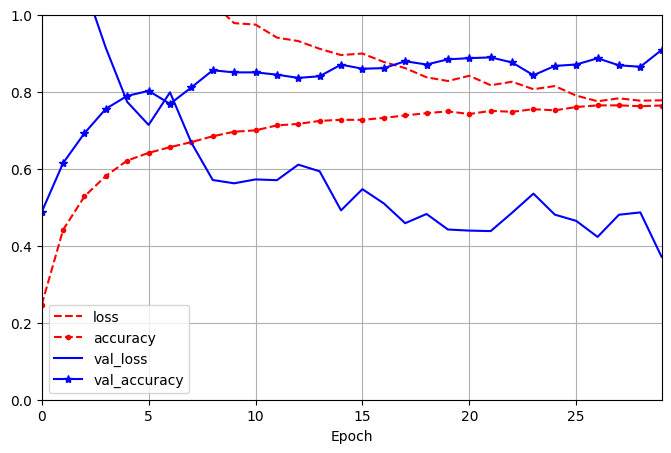

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

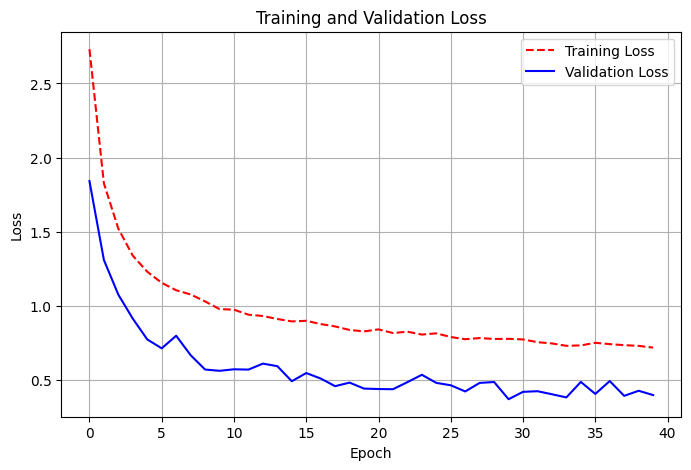

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], 'r--', label='Training Loss')
plt.plot(history.history['val_loss'], 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


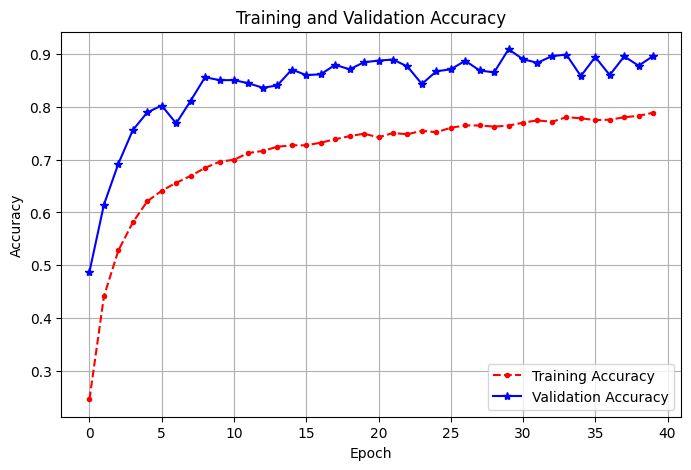

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], 'r--.', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b-*', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


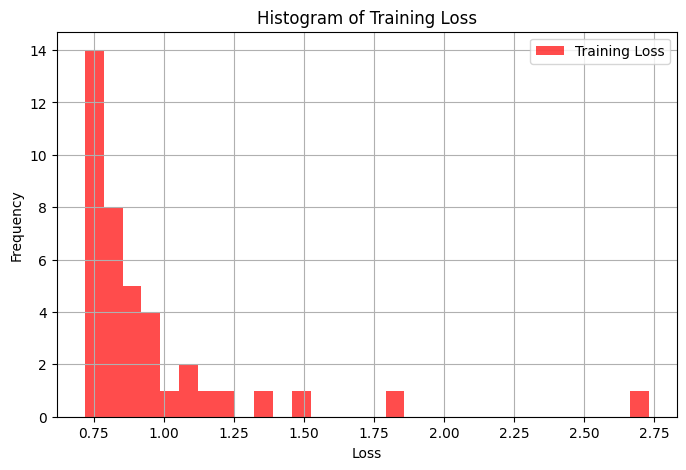

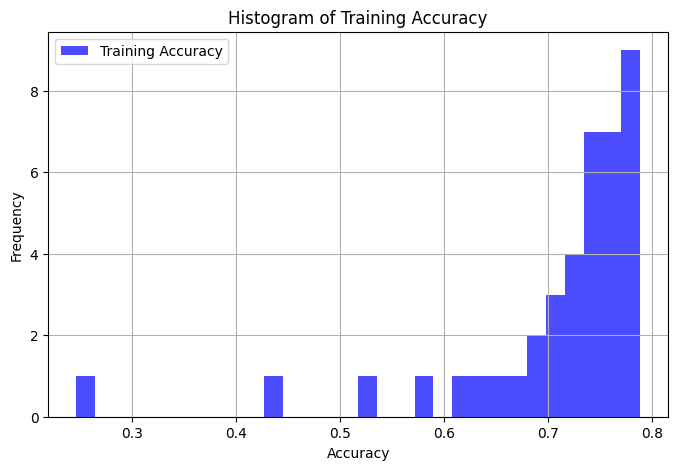

In [ ]:
# Histogram of Training Loss
plt.figure(figsize=(8, 5))
plt.hist(history.history['loss'], bins=30, color='r', alpha=0.7, label='Training Loss')
plt.title('Histogram of Training Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Histogram of Training Accuracy
plt.figure(figsize=(8, 5))
plt.hist(history.history['accuracy'], bins=30, color='b', alpha=0.7, label='Training Accuracy')
plt.title('Histogram of Training Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()


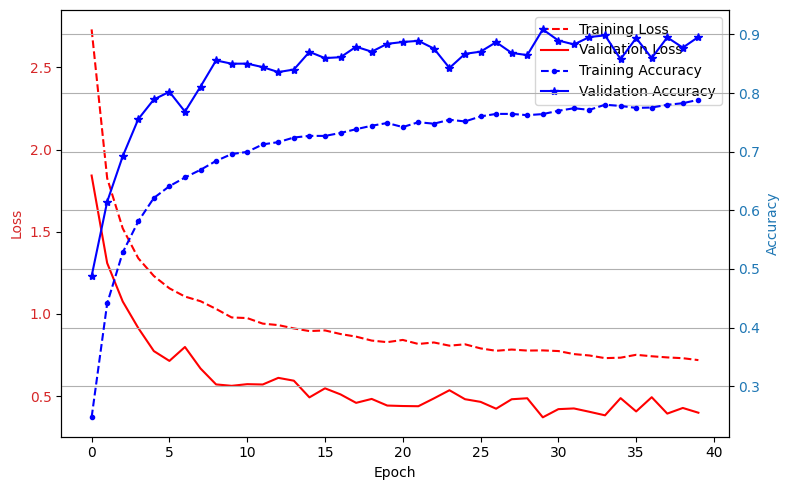

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ln1 = ax1.plot(history.history['loss'], 'r--', label='Training Loss')
ln2 = ax1.plot(history.history['val_loss'], 'r-', label='Validation Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ln3 = ax2.plot(history.history['accuracy'], 'b--.', label='Training Accuracy')
ln4 = ax2.plot(history.history['val_accuracy'], 'b-*', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Combined legends for both ax1 and ax2
lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

246/246 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.9087


[0.3704650402069092, 0.9086967706680298]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/traffic_signs_model.h5')

# Load your model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Hands-On Machine Learning - Aurelien Geron/traffic_signs_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
